In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

torch.manual_seed(0)


Using cuda device


In [2]:
x = np.linspace(-1, 1, 100)
y = x ** 2


In [3]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x
    
net = Net().to(device)
net.fc2.weight


Parameter containing:
tensor([[-0.1620, -0.1151, -0.1747, -0.2341, -0.1459,  0.2149,  0.1116,  0.1212,
          0.0131, -0.1282,  0.0423, -0.2334, -0.1806, -0.1289,  0.1577,  0.1466]],
       device='cuda:0', requires_grad=True)

In [12]:
optim = torch.optim.Adam(net.parameters(), lr=0.01)

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1).to(device)
print(x_tensor.shape)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

for i in range(1000):
    loss = F.mse_loss(net(x_tensor).squeeze(-1), y_tensor)
    
    writer.add_scalar('Loss', loss, i)
    optim.zero_grad()
    loss.backward()
    optim.step()

torch.Size([100, 1])


In [5]:
y_pred = net(x_tensor).detach().cpu().numpy()

In [6]:
net.fc2.weight

Parameter containing:
tensor([[-0.3049, -0.0192, -0.0433, -0.0425, -0.4049,  0.2632,  0.1116,  0.3998,
          0.0131, -0.3400, -0.1048, -0.2334,  0.0166,  0.5947,  1.0770,  0.1180]],
       device='cuda:0', requires_grad=True)

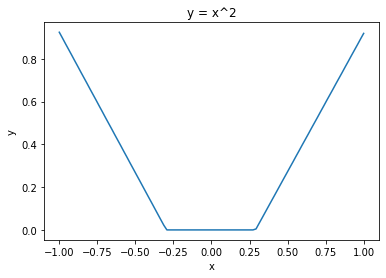

In [7]:
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.show()